# Introduction

Welcome to Module 5 of the Text Mining Track! This module will explore predictive analysis of text data. With a preprocesed data, we will build machine learning models to predict triage decision for systematic review regarding to the topic of ACE Inibitors. You will do so through a combination of video lectures, interactive notebooks, and hands-on coding exercises.

Lets begin!

## How to Run the Module

Throughout this module you will encounter both text and code cells. Please run each cell in this Notebook by clicking "Run" button in the Toolbar or by pushing Shift+Enter keys  
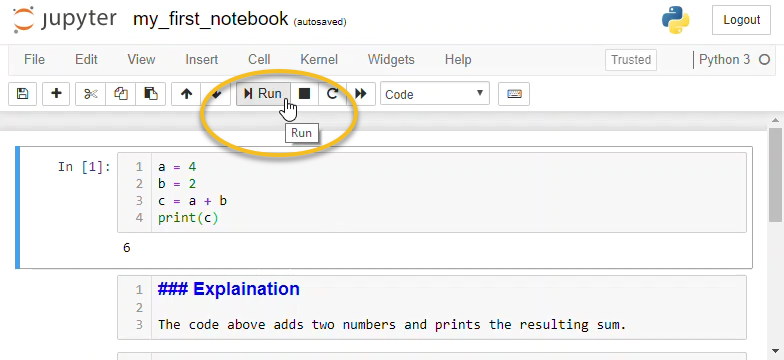


The cell below is an example of a code cell. You will be running numerous code cells like the one below throughout the case. Select the cell and select the run button above.

In [3]:
# This is an example of a code cell
print('Congratulations!')
print('You\'ve run your first code cell.')

Congratulations!
You've run your first code cell.


## Lecture Video

**Please run the code cell below to reveal the video.**

In [4]:
# Set Up
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import HTML

# Display Video
HTML('<iframe width="705" height="537" src="https://www.youtube.com/embed/STz8SnDeEWo?list=PL6IN6GlGifEytPcv5HR_iaNBekwXYZIpR" frameborder="0" allowfullscreen></iframe>')

In this module, we will predict whether an article in the dataset will be included for the systematic review of ACE Inbibitors. To this end, we will use only a part of the dataset 'epc-ir_clean_19.csv' to get the articles whose topics are 'ACEIhibitors.'  
  
In this pipeline, we go through the following steps:  
    
1. Building a bag-of-word matrix
2. Predictive analysis   
   a. Dimensionality reduction (feature selection)     
   b. Splitting data into training and testing data  
   c. Building prediction models - logistic regression and k-nearest neighbor  
   d. performance evaluation - accuracy and AUC  
  
Throughout this module, features will be represented by bag-of-words in uni-, bi-, or trigrams.

# Building a Bag-of-Word Matrix

**Transforming DataFrame into list**  
  
Run data file 'epc-ir_clean_10k.csv.'  
We will use articles whose topics are **'ACEIhibitors'** only.

In [34]:
import pandas as pd

# Our dataset is "df," a DataFrame imported from a csv file.
df = pd.read_csv('epc-ir_clean_10k.csv', index_col = 'index') 
# copy rows whose topics are 'ACEInhibitors'
df_acei = df.loc[(df['topic']=='ACEInhibitors')].copy() 

There are 2235 instances in the dataset

In [35]:
len(df_acei)

2235

Transform the column 'clean_abs' into a list

In [36]:
clean_abs_list = df_acei['clean_abs'].tolist()
clean_abs_list

['hypercholesterolemia hypertension frequently associate elevate sympathetic activity independent cardiovascular risk factor affect endotheliummediated vasodilation identify effect cholesterollowering antihypertensive treatments vascular reactivity vasodilative capacity study hypercholesterolemic hypertensive subject receive placebo weeks either enalapril simvastatin weeks finally medications additional weeks postischemic forearm blood flow mfbf minimal vascular resistance mfvr use indices vasodilative capacity structural vascular damage respectively total restingstressrecovery phase cardiovascular blood pressure [ bp ] heart rate [ hr ] regional hemodynamic fbf fvr reactivity stressful stimuli calculate areaunderthecurve auc valuextime compare baseline level simvastatin reduce total totc ldl cholesterol ldlc mmoll p mmoll p respectively enalapril also reduce totc ldlc mmoll p mmoll p respectively mfbf increase substantially treatments p enalapril greater effect arbitrary units au p si

**Feature representation by uni-, bi-, and trigrams**

`CounterVectorize()` function renders text into bag-of-words representation

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer()
cv1 = CountVectorizer() # bag-of-words model in unigram
cv2 = CountVectorizer(ngram_range=(2,2)) # bag-of-words model in bigram
cv3 = CountVectorizer(ngram_range=(3,3)) # bag-of-words model in trigram
 
# this steps generates a matrix whose rows are instances and columns are features
uni_count_vector = cv1.fit_transform(clean_abs_list)
bi_count_vector = cv2.fit_transform(clean_abs_list)
tri_count_vector = cv3.fit_transform(clean_abs_list)

Show the list of features in unigram

In [19]:
cv1.get_feature_names_out()

array(['aa', 'aaa', 'aaas', ..., 'zofenoprilat', 'zone', 'zung'],
      dtype=object)

Number of unigram features

In [20]:
uni_count_vector.shape # returns 9449 unique words (unigram)

(2235, 9449)

Number of bigram features

In [21]:
bi_count_vector.shape # returns 100008 unique features in bigrams

(2235, 100008)

Number of trigram features

In [22]:
tri_count_vector.shape # returns 159420 unique features in trigrams

(2235, 159420)

# Predictive Analysis

**Please run the code cell below to reveal the video.**

In [3]:
HTML('<iframe width="705" height="537" src="https://www.youtube.com/embed/U-74EvcOnKE?list=PL6IN6GlGifEytPcv5HR_iaNBekwXYZIpR" frameborder="0" allowfullscreen></iframe>')

Import necessary packages

In [37]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt
import numpy as np

## Logistic Regression (LR) Model

### Accuracy

**Increase the number of features by 1,000 until 100,000 and identify the number of features where we can get the highest accuracy score**

In [24]:
# call logistic regression classifier
clf = LogisticRegression()
'''
We will examine the optimal number of features (in either uni-, bi-, or trigrams)
but limit the maximum number of features to 100,000.
'''
veczr = CountVectorizer(max_features=100000, ngram_range=(1,3))
x = veczr.fit_transform(clean_abs_list)
target= df_acei['decision'].values.astype(str)

scores_lr = []

# We will examine the accuracy score with 1000, 2000, 3000,..., 99,000, and 100,000 features
for n in np.arange(1000,100000,1000):
    # choose n chi-squared features 
    ch2 = SelectKBest(chi2, k=n)
    # split the dataset into training and testing sets by 80:20 
    x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2, random_state=10)
    # train the classifier
    x_train_chi2_selected = ch2.fit_transform(x_train, y_train)
    # prepare testing sets
    x_test_chi2_selected = ch2.transform(x_test)
    # make a prediction model based on training dataset
    clf.fit(x_train_chi2_selected, y_train)
    # predict the class of testing sets and calculate accuracy 
    score_lr = accuracy_score(y_test, clf.predict(x_test_chi2_selected))
    # store each accuracy score earned at n features and add the score to the list 'scores_lr'
    scores_lr.append(score_lr)
    
# the maximum accuracy is the maximum value in the 'scores_lr' list
max_score_lr = max(scores_lr)
print("Max Accuracy of LR Model:", max_score_lr)

Max Accuracy of LR Model: 0.9239373601789709


**Plot the relationship between the number of features and accuracy scores**

Text(0, 0.5, 'Validation set accuracy of logistic regression model')

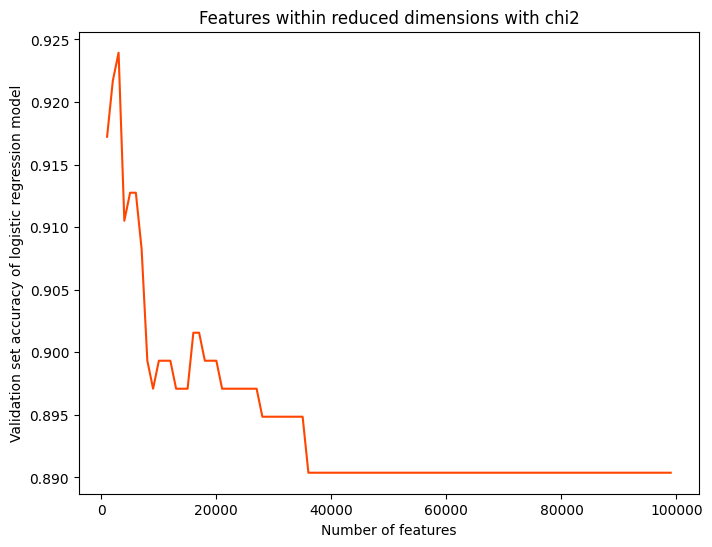

In [25]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1000,100000,1000), scores_lr, color='orangered')

plt.title("Features within reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy of logistic regression model")

We can see the best accuracy was achieved with 3,000 features.  
(The number of features at which you can achieve the best accuracy score can be different from my result)

### AUC

In [26]:
# we will examine false positive rates at every point (e.g., 1%,2%,...,99%,100%)
mean_fpr_lr = np.linspace(0,1,100)

# split dataset into training and testing sets by 80:20
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2, random_state=10)
# predict class of instances in testing set
prediction_lr = clf.fit(x_train, y_train).predict_proba(x_test)
# Get false positive rate, true positive rate, and threshold
fpr_lr, tpr_lr, t_lr = roc_curve(y_test, prediction_lr[:, 1], pos_label='1')
# Get AUC score
auc_lr = auc(fpr_lr, tpr_lr)

print('AUC of LR Model:', auc_lr)

AUC of LR Model: 0.7550013517166801


## k-Nearest Neighbor (KNN) Model

### Accuracy

**Increase the number of features by 1,000 until 100,000 and identify the number of features where we can get the highest accuracy score**

In [27]:
# call knn classifier
knn = KNeighborsClassifier()

scores_knn = []

for n in np.arange(1000,100000,1000):
    ch2 = SelectKBest(chi2, k=n)
    x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2, random_state=10)
    x_train_chi2_selected = ch2.fit_transform(x_train, y_train)
    x_test_chi2_selected = ch2.transform(x_test)
    knn.fit(x_train_chi2_selected, y_train)
    score_knn = accuracy_score(y_test, knn.predict(x_test_chi2_selected))
    mean_score_knn = score_knn.mean()
    scores_knn.append(mean_score_knn)

max_score_knn = max(scores_knn)
print("Max Accuracy of KNN Model:", max_score_knn)

Max Accuracy of KNN Model: 0.9194630872483222


**Plot the relationship between the number of features and accuracy scores**

Text(0, 0.5, 'Validation set accuracy of KNN model')

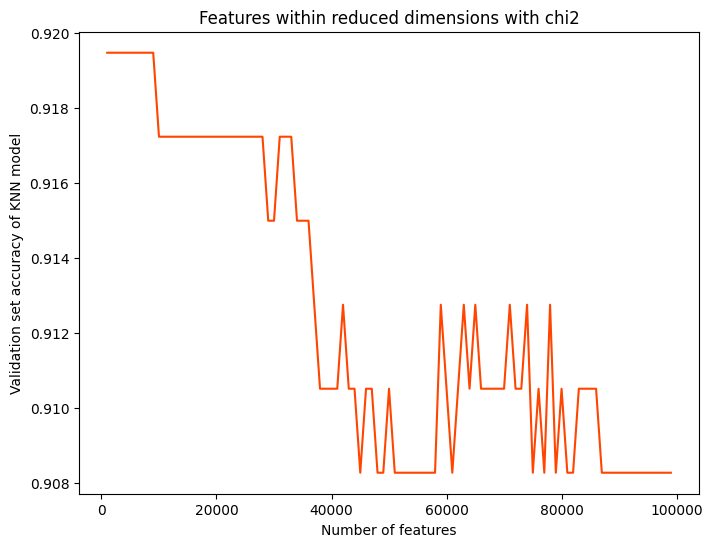

In [28]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1000,100000,1000), scores_knn, color='orangered')

plt.title("Features within reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy of KNN model")

We can see the best accuracy was achieved with a range of 1,000-9,000 features.  
(The number of features at which you can achieve the best accuracy score can be different from my result)

### AUC

In [29]:
mean_fpr_knn = np.linspace(0,1,100)

x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2, random_state=10)
prediction_knn = knn.fit(x_train, y_train).predict_proba(x_test)
fpr_knn, tpr_knn, t_knn = roc_curve(y_test, prediction_knn[:, 1], pos_label='1')
auc_knn = auc(fpr_knn, tpr_knn)

print('AUC of KNN Model:', auc_knn)

AUC of KNN Model: 0.5647810218978103


## Concluding Visualization

Make a table that shows the accuracy and AUC scores of each model

In [30]:
models = []
accuracies = []
AUCs = []

models.append('LR')
models.append('KNN')

accuracies.append(max_score_lr)
accuracies.append(max_score_knn)

AUCs.append(auc_lr)
AUCs.append(auc_knn)

model_perform = pd.DataFrame({'Models': models, 'Accuracy': accuracies, 'AUC':AUCs})
#final_models_auc_sorted = final_models_auc.sort_values('Accuracy', ascending=False)
print(model_perform)

  Models  Accuracy       AUC
0     LR  0.923937  0.755001
1    KNN  0.919463  0.564781


**Plot bar graph of final Accuracy**

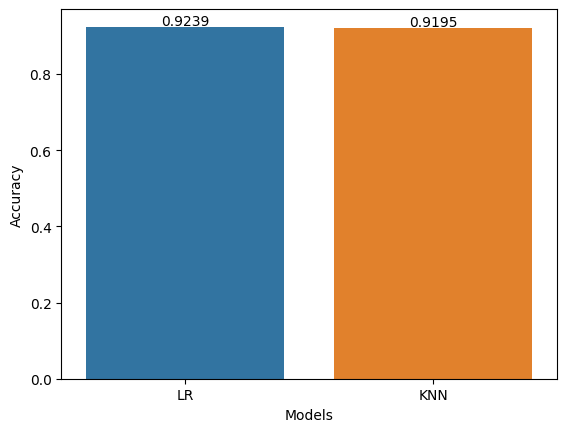

In [31]:
import seaborn as sns

axis = sns.barplot(x = 'Models', y = 'Accuracy', data = model_perform)
axis.set(xlabel = 'Models', ylabel = 'Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha='center')
#plt.bar(6, height, color = ('blue','green','red','cyan','magenta','yellow','black'))
#plt.ylim([0.0, 1.0])
plt.show()

**Plot bar graph of AUC**

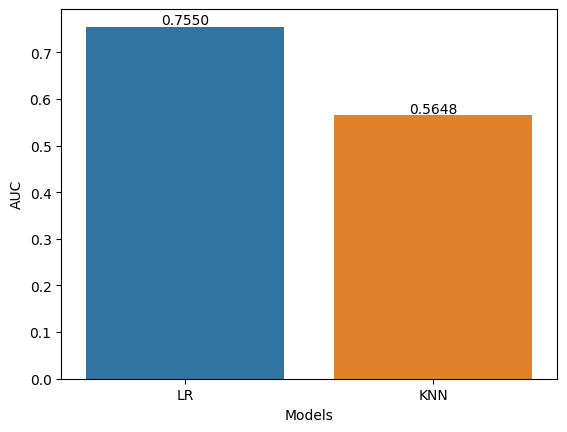

In [32]:
axis = sns.barplot(x = 'Models', y = 'AUC', data = model_perform)
axis.set(xlabel = 'Models', ylabel = 'AUC')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha='center')
#plt.bar(6, height, color = ('blue','green','red','cyan','magenta','yellow','black'))
#plt.ylim([0.0, 1.0])
plt.show()

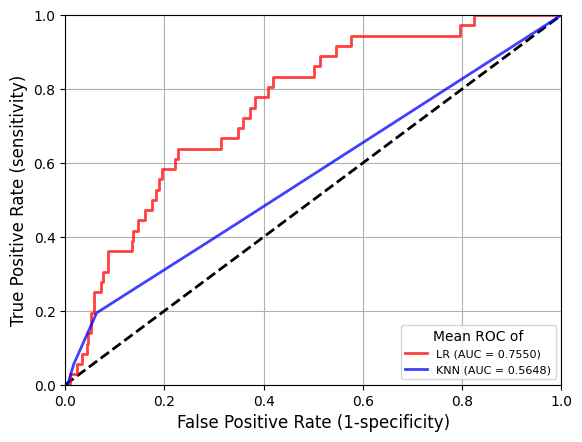

In [33]:
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

plt.plot(fpr_lr, tpr_lr, color='red',
         label=r'LR (AUC = %0.4f)' %auc_lr, lw=2, alpha=0.75)

plt.plot(fpr_knn, tpr_knn, color='blue',
         label=r'KNN (AUC = %0.4f)' %auc_knn, lw=2, alpha=0.75)

plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('False Positive Rate (1-specificity)', fontsize = 12)
plt.ylabel('True Positive Rate (sensitivity)', fontsize = 12)
plt.legend(loc="lower right", fontsize = 8, title = 'Mean ROC of')
plt.grid(True)
plt.show()

Logistic regression performs much better than KNN!